In [ ]:
from google.colab import drive
drive.mount('/content/drive')

thêm các thư viện cần thiết


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
# from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import optimize
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from google.colab.patches import cv2_imshow
import cv2
from keras.datasets import mnist

load data của bộ minist  https://paperswithcode.com/dataset/mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


**In random data trong bộ mnist để test**

In [ ]:
plt.figure(figsize = (15,15))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(x_train[i].reshape(28,28),interpolation='nearest', cmap='Greys')
    plt.title((y_train[i]))
plt.show()

chia x_train, y_train ra thành 2 tập x_train,y_train, x_val, y_val để tiền thành train model

In [5]:
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [6]:
print("tap train co {} anh".format(x_train.shape[0]))
print("tap test co {} anh".format(x_test.shape[0]))
print("tap val co {} anh".format(x_val.shape[0]))

tap train co 48000 anh
tap test co 10000 anh
tap val co 12000 anh


**đồ thị số lượng các ảnh từ số 0 -> số 9 trong tập train**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


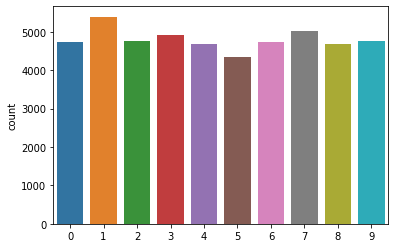

In [7]:
sns.countplot(y_train)

**đồ thị số lượng các ảnh từ số 0 -> số 9 trong tập val**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


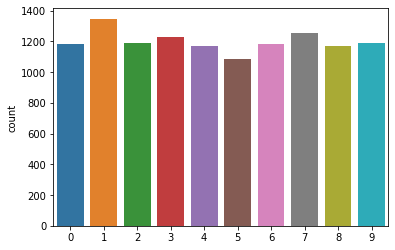

In [8]:
sns.countplot(y_val)

**đồ thị số lượng các ảnh từ số 0 -> số 9 trong tập test**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


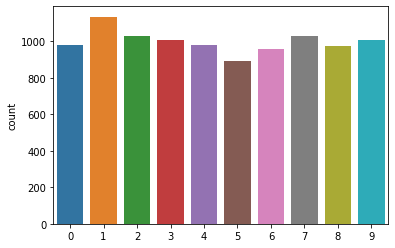

In [9]:
sns.countplot(y_test)

**Chuyển đầu ra thành dạng vector**

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
print(y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
print(x_train.shape)
print(x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


Xây dưng model theo dạng

conv2d -> maxpoooling -> conv2d -> maxpoooling -> platten -> dense(64) -> 128 -> 26

Dùng hàm kích hoạt là softmax để đưa ra kết quả dưới dạng xác suất

Dùng hàm mất mát categorical_crossentropy

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(10,activation ="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

**train model**

In [13]:
batch_size = 32
epochs = 20
h = model.fit(x_train,y_train,
              batch_size = batch_size,
              epochs = epochs,
              verbose = 1,
              validation_data = (x_val,y_val))

Epoch 1/20
1500/1500 [==============================] - 16s 5ms/step - loss: 0.2324 - accuracy: 0.9445 - val_loss: 0.1023 - val_accuracy: 0.9678
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0628 - accuracy: 0.9808 - val_loss: 0.0654 - val_accuracy: 0.9821
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0522 - val_accuracy: 0.9858
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0425 - accuracy: 0.9873 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0610 - val_accuracy: 0.9836
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0313 - accuracy: 0.9907 - val_loss: 0.0537 - val_accuracy: 0.9849
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9921 - val_loss: 0.0746 - val_accuracy

**Đưa ra kết qua sau khi train model**

In [ ]:
res = model.evaluate(x_test, y_test)
print("hiệu suất của mô hình là : {}".format(res[1] * 100))

plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(h.history['accuracy'], label='Training')
plt.plot(h.history['val_accuracy'], label='Validation')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(122)
plt.plot(h.history['loss'], label='Training')
plt.plot(h.history['val_loss'], label='Validation')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Lấy một số ảnh ra test**

1/1 [==============================] - 0s 18ms/step


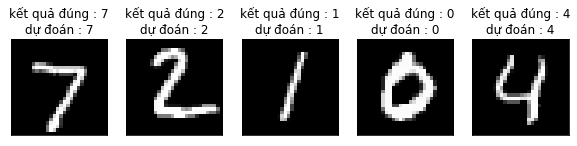

In [20]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    s = "kết quả đúng : " + str(np.argmax(y_test[i])) +'\ndự đoán : ' + str(np.argmax(model.predict(x_test[i].reshape(1,28,28,1)))   )
    s = str(s)
    plt.title(s)
    plt.xticks([])
    plt.yticks([])
plt.show()